In [ ]:
# IMPORTS & LOADS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load dataset (adjust path if needed)
df = pd.read_csv("../data/raw/depression_dataset_reddit_cleaned.csv")
print("shape:", df.shape)
print(df.columns.tolist())
df.head(5)


shape: (7731, 2)
['clean_text', 'is_depression']


,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB
None
clean_text       0
is_depression    0
dtype: int64
Label distribution:
 is_depression
0    3900
1    3831
Name: count, dtype: int64


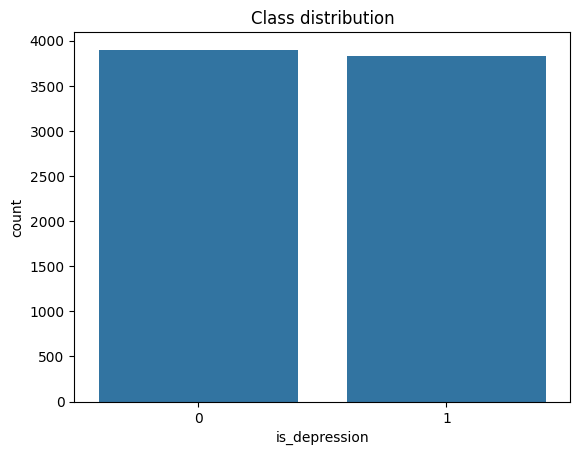

In [2]:
# QUICK CHECKS
print(df.info())
print(df.isnull().sum())

# IF LABEL IS NOT BINARY, ADAPT MAPPING: HERE ASSUMING 'is_depression' EXISTS:
if 'is_depression' in df.columns:
    print("Label distribution:\n", df['is_depression'].value_counts())
    sns.countplot(x='is_depression', data=df);
    plt.title("Class distribution")
    plt.show()
else:
    display(df.head())


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       585
           1       0.97      0.96      0.96       575

    accuracy                           0.96      1160
   macro avg       0.96      0.96      0.96      1160
weighted avg       0.96      0.96      0.96      1160



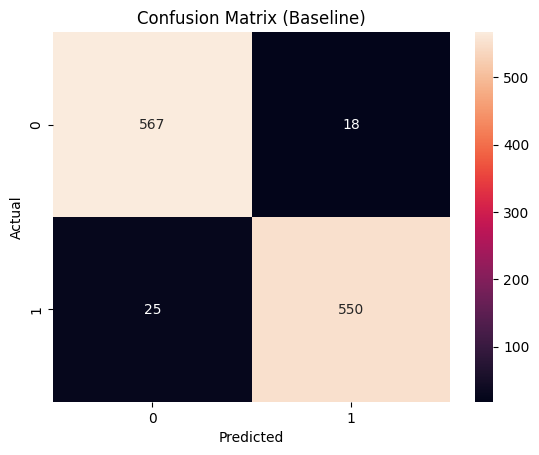

In [3]:
# SPLIT
X = df['clean_text'].astype(str).values
y = df['is_depression'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# TF-IDF
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2), stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# TRAIN BASELINE CLASSIFIER
clf = LinearSVC(class_weight='balanced', random_state=42, max_iter=10000)
clf.fit(X_train_tfidf, y_train)

# SAVE MODELS FOR APP
joblib.dump(tfidf, "../models/tfidf_baseline.joblib")
joblib.dump(clf, "../models/linear_svc_baseline.joblib")

# EVALUATE
y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix (Baseline)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()
